In [1]:
from IPython.display import display
import sympy as S
S.init_printing()

In [2]:
v, ω, a, α, mr, mw, Ir, Iw, r, d = S.symbols("v, omega, a, alpha, m_r, m_w, I_r, I_w, r, d")
ωL, ωR, αL, αR, Ffl, Ffr, Mil, Mir =  S.symbols(
    "omega_L, omega_R, alpha_L, alpha_R, F_fl, F_fr, M_il, M_ir")

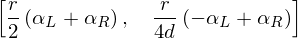

In [3]:
# the constraints
constraints = [r/2 * (αL + αR), (r/(4*d)) * (-αL + αR)]
constraints

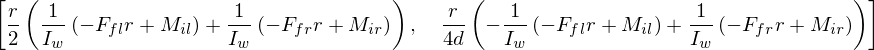

In [4]:
# we know how αL and αR relate to the applied moment and floor friction, so substitute that
constraints = list(map(lambda x: x.subs(αL, (1/Iw) * (Mil - r * Ffl)).subs(
            αR, (1/Iw) * (Mir - r * Ffr)), constraints))

constraints

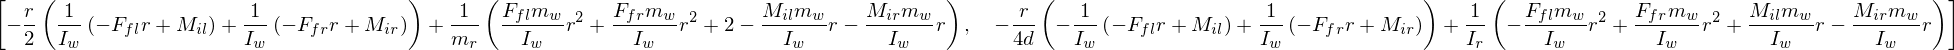

In [5]:
FL_ = 1 + ((mw*r**2)/Iw)*Ffl - (mw*r)/Iw * Mil
FR_ = 1 + ((mw*r**2)/Iw)*Ffr - (mw*r)/Iw * Mir

equations = [(1/mr) * (FL_ + FR_) - constraints[0], 
             (1/Ir) * (FR_ - FL_) - constraints[1]]

equations

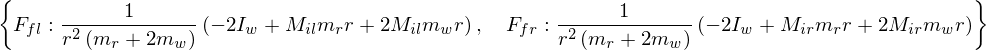

In [6]:
frictions = S.solve(equations, [Ffl, Ffr])
frictions

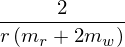

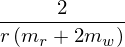

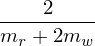

In [7]:
# we have the frictions, so we now know the original equations of motion
# in terms of only the moment inputs!

# compute the wheel angular accelerations:
αL_ = (1/Iw) * (Mil - r * frictions[Ffl])
αR_ = (1/Iw) * (Mir - r * frictions[Ffr])

display(αL_.simplify())
display(αR_.simplify())

forward_acceleration = (r/2) * (αL_ + αR_)
display(forward_acceleration.simplify())

angular_acceleration = (r/(4*d)) * (αR_ - αL_)
display(angular_acceleration.simplify())

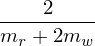

In [8]:
# add in the friction terms
Mfl, Mfr = S.symbols("Mfl, Mfr")
forward_acceleration = forward_acceleration.subs(Mil, Mil + Mfl).subs(Mir, Mir + Mfr)
angular_acceleration = angular_acceleration.subs(Mil, Mil + Mfl).subs(Mir, Mir + Mfr)

display(forward_acceleration.simplify())
display(angular_acceleration.simplify())

In [13]:
vL, vR, v, ω, d = S.symbols("v_L, v_R, v, ω, d")
S.solve([v - (vL + vR) / 2, ω - (1/(2*d)) * (vR - vL)], [vL, vR])